In [1]:
from polyglot.text import Text   #形態素解析

def keitaiso(text):
    tokens = Text(text)
    
    for token in tokens.pos_tags:
            print(token[0], " : ", token[1])

In [2]:
text = "Whole families had been destroyed by Chancery and Chancery had brought great houses to decay and destruction"
keitaiso(text);

Whole  :  ADJ
families  :  NOUN
had  :  AUX
been  :  AUX
destroyed  :  VERB
by  :  ADP
Chancery  :  PROPN
and  :  CONJ
Chancery  :  PROPN
had  :  AUX
brought  :  VERB
great  :  ADJ
houses  :  NOUN
to  :  PART
decay  :  VERB
and  :  CONJ
destruction  :  NOUN


In [3]:
text = "What is this? "
keitaiso(text);

What  :  PRON
is  :  VERB
this  :  DET
?  :  PUNCT


In [4]:
text = "What about a cup of tea ?"
keitaiso(text);

What  :  PRON
about  :  ADP
a  :  DET
cup  :  NOUN
of  :  ADP
tea  :  NOUN
?  :  PUNCT


In [5]:
text = "I don't know what he said."

keitaiso(text);

I  :  PRON
don't  :  VERB
know  :  VERB
what  :  PRON
he  :  PRON
said  :  VERB
.  :  PUNCT


In [6]:
text = "I was taught English by our teacher."
keitaiso(text);

I  :  PRON
was  :  AUX
taught  :  VERB
English  :  PROPN
by  :  ADP
our  :  PRON
teacher  :  NOUN
.  :  PUNCT


In [7]:
text = "Could you go over it again? I couldn't make out what you were getting at"
keitaiso(text);

Could  :  AUX
you  :  PRON
go  :  VERB
over  :  ADV
it  :  PRON
again  :  ADV
?  :  PUNCT
I  :  PRON
couldn't  :  NUM
make  :  VERB
out  :  ADP
what  :  PRON
you  :  PRON
were  :  AUX
getting  :  VERB
at  :  ADP


In [8]:
text = "He never fail until you stop trying."
keitaiso(text);

He  :  PRON
never  :  ADV
fail  :  VERB
until  :  SCONJ
you  :  PRON
stop  :  VERB
trying  :  VERB
.  :  PUNCT


In [9]:
text = "Cafe Colombo is always busy. "
keitaiso(text);

Cafe  :  PROPN
Colombo  :  PROPN
is  :  VERB
always  :  ADV
busy  :  ADJ
.  :  PUNCT


In [29]:
text = "I couldn't do that"
keitaiso(text);

I  :  PRON
couldn't  :  NUM
do  :  VERB
that  :  DET


In [11]:
import re  #正規表現
import numpy as np
from sklearn.preprocessing import LabelEncoder


def keitaiso_num(text):   #形態素解析して数値配列へ
#文章のクリーニング（ピリオド以外の記号を削除）

    #ラベルエンコーディング
    le = LabelEncoder()
    tag_list = ['ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'VERB']
    le.fit(tag_list)

    code_regex = re.compile('[!"#$%&\'\\\\()*+,\/:;<=>?@[\\]^_`{|}~「」〔〕“”‘’〈〉『』【】＆＊・（）＄＃＠—–、？！｀＋￥％]')
    
    cleaned_text = code_regex.sub('', text)
    
    cleaned_text = cleaned_text.replace('-', ' ').replace('\'s', '')

#     print(cleaned_text)


    #形態素解析
    tokens = Text(cleaned_text)

    tag_list = []
    for token in tokens.pos_tags:
            tag_list.append(token[1])

    tag_arr = np.array(tag_list)
#     print(tag_arr)
    
    num_tag = le.transform(tag_arr)
    
    return num_tag



In [12]:
#プロット

%matplotlib inline
import matplotlib.pyplot as plt

def plot(*texts):
    plt.figure(figsize=(20, 5), dpi=100)

    count = 0
    for text in texts:
        print(text)
        plt.plot(text, 'o', linestyle='-', label = f'{count}')
        count += 1

    plt.legend()

#     x_min = 0
#     x_max = 50
#     p = plt.hlines([11], x_min, x_max, "red", linestyles='dashed')     # hlines
#     plt.xlim(x_min, x_max) #x軸範囲指定
    plt.grid(True)

    plt.show()

[10  2 14  5  7  1 10  7 12]
[10  3 14 11  1 10  7  7 12]


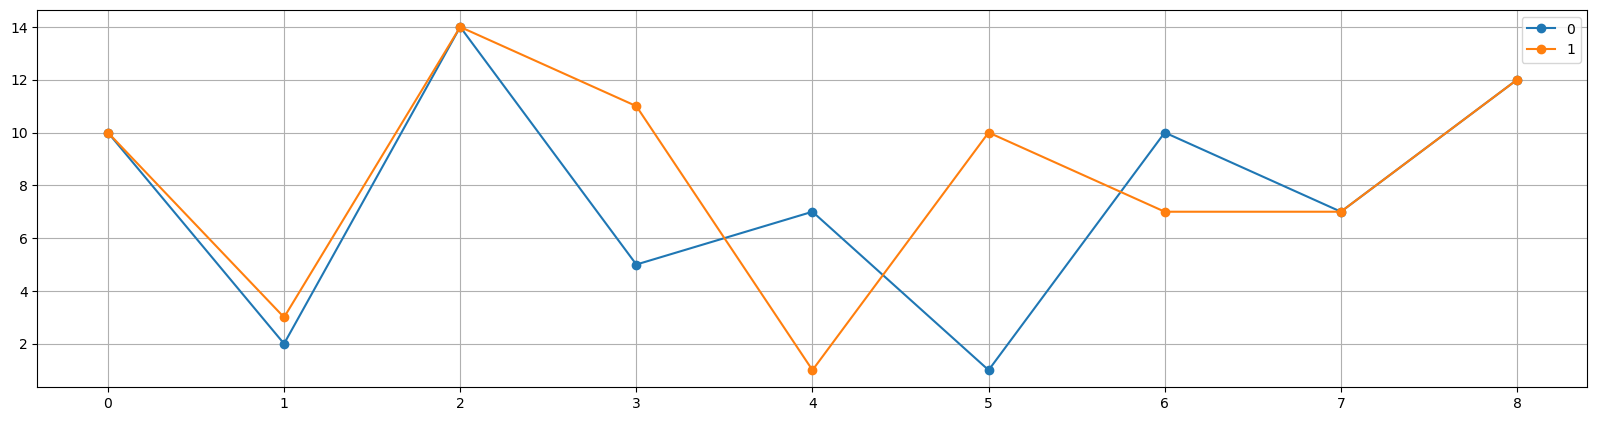

In [13]:
text = "She sometimes plays the piano for their family."
plot_text = keitaiso_num(text)

text2 = "I was taught English by our teacher yesterday."
plot_text2 = keitaiso_num(text2)

text3 = "I'm haunted by a vivid nightmare I had."
plot_text3 = keitaiso_num(text3)

text4 =  "He sticked to his moral principals and believes."
plot_text4 = keitaiso_num(text4)

text5 = "When are you going to　eat lunch with me?"
plot_text5 = keitaiso_num(text5)

text6 = "Hey nice too meet you Bob How are you ? "
plot_text6 = keitaiso_num(text6)

plot(plot_text, plot_text2)

In [14]:
def cosin_similarity(x, y):
    return np.dot(x, y)/(np.sqrt(np.dot(x, x))*np.sqrt(np.dot(y, y)))

cosin_similarity(plot_text, plot_text2)
cosin_similarity(plot_text, plot_text5)


0.7991734782803351

In [ ]:
aaaa